<a href="https://colab.research.google.com/github/BalaSubbaiah2003/PDL_Waste_Classifier/blob/main/VerifyWaste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step1:Unzip the dataset zip file we want Classify


1.   The data set contains two folders each of them have images


*   Bio degradable
*   Non Bio degradable 






In [ ]:
!unzip /content/drive/MyDrive/PDL-LAB/PDL_DataSet.zip

Step2 : Import necessary modules

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Step 3: Load the Data

In [ ]:
data=tf.keras.utils.image_dataset_from_directory(
    "/content/DataSet")

Found 26541 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

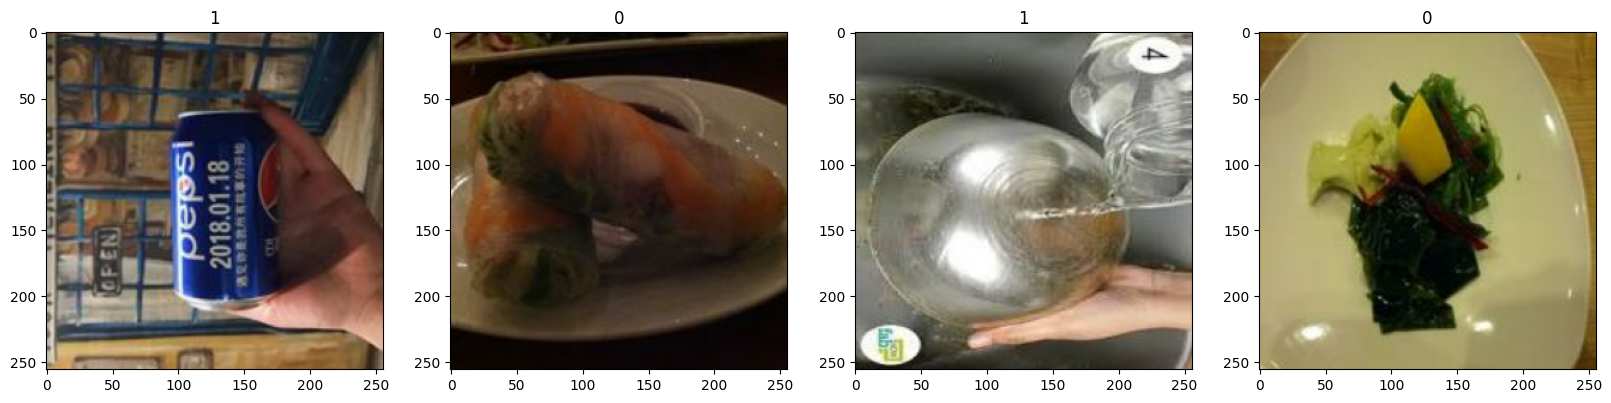

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Step 4: Scale the data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

Step 5: Split Data for Training and Testing

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

581

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Step 6: Build Deep Learning Model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Step 7:Train the Data

In [ ]:
logdir='/content/Train'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [20]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
581/581 [==============================] - 1328s 2s/step - loss: 0.3234 - accuracy: 0.8663 - val_loss: 0.2542 - val_accuracy: 0.9021
Epoch 2/10
581/581 [==============================] - 1265s 2s/step - loss: 0.2487 - accuracy: 0.9031 - val_loss: 0.2215 - val_accuracy: 0.9108
Epoch 3/10
581/581 [==============================] - 1300s 2s/step - loss: 0.2025 - accuracy: 0.9213 - val_loss: 0.2437 - val_accuracy: 0.9000
Epoch 4/10
581/581 [==============================] - 1303s 2s/step - loss: 0.1559 - accuracy: 0.9395 - val_loss: 0.2792 - val_accuracy: 0.8944
Epoch 5/10
581/581 [==============================] - 1292s 2s/step - loss: 0.1122 - accuracy: 0.9580 - val_loss: 0.3258 - val_accuracy: 0.8782
Epoch 6/10
581/581 [==============================] - 1304s 2s/step - loss: 0.0730 - accuracy: 0.9731 - val_loss: 0.3527 - val_accuracy: 0.8965
Epoch 7/10
581/581 [==============================] - 1306s 2s/step - loss: 0.0502 - accuracy: 0.9819 - val_loss: 0.4020 - val_accuracy:

Step 8: Plot Performance

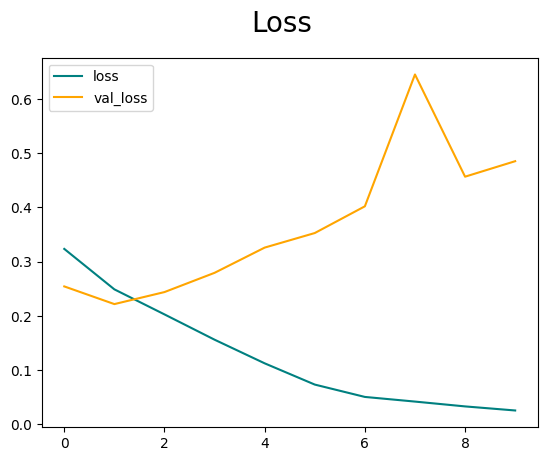

In [21]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

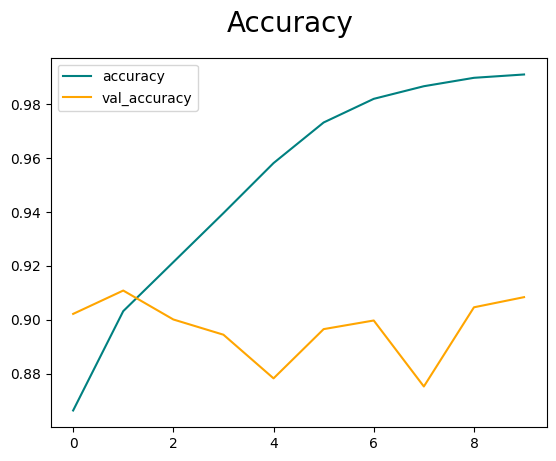

In [22]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Step 9 :Convert and Download Model as tflite . This is final model That can be import our android application.

In [23]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)